# Exploratory Data Analysis of Water Quality Samples in Miami, FL


#### Analytical/Scientific Content: 

Water quality samples from 26 sites in Miami, FL are typically collected once a week, though frequency varies among the sites. The EPA has set the following standards for water considered safe for swimming:

**0-69** CFU/MPN per 100 mL enterococci per sample: **Safe for swimming** 

**70+** CFU/MPN per 100 mL enterococci per sample: **Not safe for swimming**

Enterococci are bacteria found in human and animal intestines. The EPA sets standards for levels in water to assess contamination and the presence of harmful pathogens. Elevated enterococci levels indicate unsafe water quality for swimming, prompting regulatory advisories to prevent waterborne illnesses.

70 CFU/MPN per 100 mL: This means that in every 100 milliliters (mL) of the water sample, there are an estimated 70 colony forming units or most probable number of Enterococci bacteria. The value indicates the bacterial load or concentration of Enterococci in the sample, and it's used as an indicator of water quality, especially in terms of potential contamination.

You may be surpised to learn that samples at some sites have estimated over 30,000 CPU/MPN per 100 mL! Significantly beyond the safety standards set by the EPA.


More about the Data Source: https://www.miamiwaterkeeper.org/water_quality_monitoring

Data Source: https://docs.google.com/spreadsheets/d/e/2PACX-1vSvNIx_XmP7N5YBYVD4hXADdlRO5q63ow47bqydSsJXTWsBHERocBEvOdIU456SC7x0wQHeNX1jlCpa/pubhtml?gid=993352322&single=true

## Import required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


## Let's Preview the Raw Dataset as a Dataframe

In [2]:
df = pd.read_csv('data/water_quality.csv')
df

,1,SUM of MPN,Date,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146
0,2,Sample Site,8/21/2023,8/14/2023,8/7/2023,7/31/2023,7/24/2023,7/12/2023,7/10/2023,7/3/2023,...,2/7/2022,1/31/2022,1/26/2022,1/24/2022,1/19/2022,1/13/2022,1/10/2022,1/4/2022,1/3/2022,NaN
1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,4,Arch Creek 1,NaN,NaN,NaN,NaN,NaN,983,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,Biscayne Canal at MCDS,NaN,NaN,NaN,NaN,NaN,141,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,East Greynolds Park,NaN,NaN,NaN,NaN,NaN,676,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
977,979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Now, let's run a basic evaluation of the dataset using the describe function

In [3]:
df.describe()

,1,Unnamed: 146
count,981.000000,1.0
mean,492.000000,0.0
std,283.334608,NaN
min,2.000000,0.0
25%,247.000000,0.0
50%,492.000000,0.0
75%,737.000000,0.0
max,982.000000,0.0


## Q: What are some observations we can make about our data based on the DataFrames above?

    - The dataframe has data starting on 1/3/2022 and ending 8/21/2023.
    - There are a lot of NaN values, but that is expected since samples aren't taken or measured every day .
    - The water quality metrics did not import as floats or integers. They are probably strings which will need to be converted 
      to floats so that we can analyze the data. 
    - The header row should be the row below the current header.
    - There are a bunch of nan rows and one nan column at the end that isn't need. The dataframe will generally need to be
    cleaned up prior to analysis.
    - ...

## Next we'll clean up the data.

In [4]:
#Remove the rows that don't have a sample site name
df_cleaning = df[df['SUM of MPN'].notna()]
#Remove extraneous columns
df_cleaning.columns = df_cleaning.iloc[0]
df_cleaning= df_cleaning.drop(df_cleaning.index[0])
df_cleaning.reset_index(drop=True, inplace=True)
df_cleaning.drop(2, axis=1, inplace=True)
df_cleaned = df_cleaning.iloc[:, :-1]
# Set Index
df_cleaned.set_index("Sample Site", inplace=True)
# Lastly, let's ensure that all the non nan values are floats
for col in df_cleaned.columns:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: float(str(x).replace(',', '')) if pd.notnull(x) else x)

## Preview of the cleaned up DataFrame that we will be working with

In [5]:
df_cleaned

,8/21/2023,8/14/2023,8/7/2023,7/31/2023,7/24/2023,7/12/2023,7/10/2023,7/3/2023,6/28/2023,6/26/2023,...,2/9/2022,2/7/2022,1/31/2022,1/26/2022,1/24/2022,1/19/2022,1/13/2022,1/10/2022,1/4/2022,1/3/2022
Sample Site,,,,,,,,,,,,,,,,,,,,,
Arch Creek 1,NaN,NaN,NaN,NaN,NaN,983.0,NaN,NaN,3199.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Biscayne Canal at MCDS,NaN,NaN,NaN,NaN,NaN,141.0,NaN,NaN,771.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
East Greynolds Park,NaN,NaN,NaN,NaN,NaN,676.0,NaN,NaN,474.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jose Marti Park,NaN,NaN,NaN,NaN,NaN,1063.0,NaN,NaN,225.0,NaN,...,109.0,295.0,41.0,NaN,63.0,20.0,NaN,52.0,NaN,146.0
Kennedy Park,20.0,52.0,52.0,10.0,NaN,NaN,10.0,134.0,790.0,NaN,...,NaN,41.0,10.0,NaN,20.0,5.0,NaN,41.0,NaN,31.0
Key Biscayne Beach Club,393.0,20.0,20.0,5.0,5.0,NaN,10.0,5.0,NaN,145.0,...,NaN,5.0,5.0,5.0,NaN,5.0,NaN,5.0,10.0,NaN
Key Biscayne Yacht Club,10.0,10.0,5.0,10.0,5.0,NaN,5.0,10.0,NaN,5.0,...,NaN,5.0,5.0,5.0,NaN,5.0,NaN,5.0,5.0,NaN
Little River 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,446.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Little River 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Which sample sites have exceeded the 70 CFU/MPN per 100 mL the most

Steps:
- Transpose the dataframe so that the sites are on the Y-Axis and the dates are on the X-Axis simply with df_cleaned.transpose()
- Filter the data to only include the sample tests that exceed 70 CFU/MPN per 100 mL 
- Group the data by sample site and count the number of samples tests

In [6]:
# Transpose the data
df_transposed = df_cleaned.transpose()
df_transposed

Sample Site,Arch Creek 1,Biscayne Canal at MCDS,East Greynolds Park,Jose Marti Park,Kennedy Park,Key Biscayne Beach Club,Key Biscayne Yacht Club,Little River 1,Little River 2,Little River Drive,...,Miami Marine Stadium,Miami River Boat Ramp,Miami River Salinity Control Structure,Miami River Upstream,Morningside Park,North Bay Village Dog Park,North Bay Village Marina,RSMAS,Shake A Leg,Silver Sands Beach Resort
0,,,,,,,,,,,,,,,,,,,,,
8/21/2023,NaN,NaN,NaN,NaN,20.0,393.0,10.0,NaN,NaN,NaN,...,52.0,NaN,NaN,NaN,74.0,NaN,52.0,20.0,6653.0,206.0
8/14/2023,NaN,NaN,NaN,NaN,52.0,20.0,10.0,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,10.0,5.0,NaN,52.0,10.0,5.0
8/7/2023,NaN,NaN,NaN,NaN,52.0,20.0,5.0,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,30.0,NaN,5.0,10.0,85.0,5.0
7/31/2023,NaN,NaN,NaN,NaN,10.0,5.0,10.0,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,121.0,20.0,NaN,41.0,94.0,5.0
7/24/2023,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/19/2022,NaN,NaN,NaN,20.0,5.0,5.0,5.0,NaN,NaN,NaN,...,41.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0,10.0,10.0
1/13/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN
1/10/2022,NaN,NaN,NaN,52.0,41.0,5.0,5.0,NaN,NaN,NaN,...,41.0,NaN,NaN,NaN,52.0,NaN,NaN,323.0,52.0,5.0


In [7]:
# Count the number of days each sample site has measured 70 or above
count_70_or_above = df_transposed[df_transposed >= 70].count()

In [8]:
# Sort the counts in descending order and print result
count_70_or_above_sorted = count_70_or_above.sort_values(ascending=False)

count_70_or_above_sorted

Sample Site
Arch Creek 1                               82
Little River 1                             63
Jose Marti Park                            61
Little River West                          56
Morningside Park                           51
East Greynolds Park                        41
Biscayne Canal at MCDS                     39
Matheson Hammock                           37
Shake A Leg                                31
RSMAS                                      29
Kennedy Park                               28
Miami Marine Stadium                       22
Mariner Drive                              12
Little River 2                              8
Silver Sands Beach Resort                   7
Key Biscayne Beach Club                     6
North Bay Village Dog Park                  6
Key Biscayne Yacht Club                     4
Little River Spur Canal                     1
Little River Upstream                       1
Little River Salinity Control Structure     1
Miami River Boat Ramp 

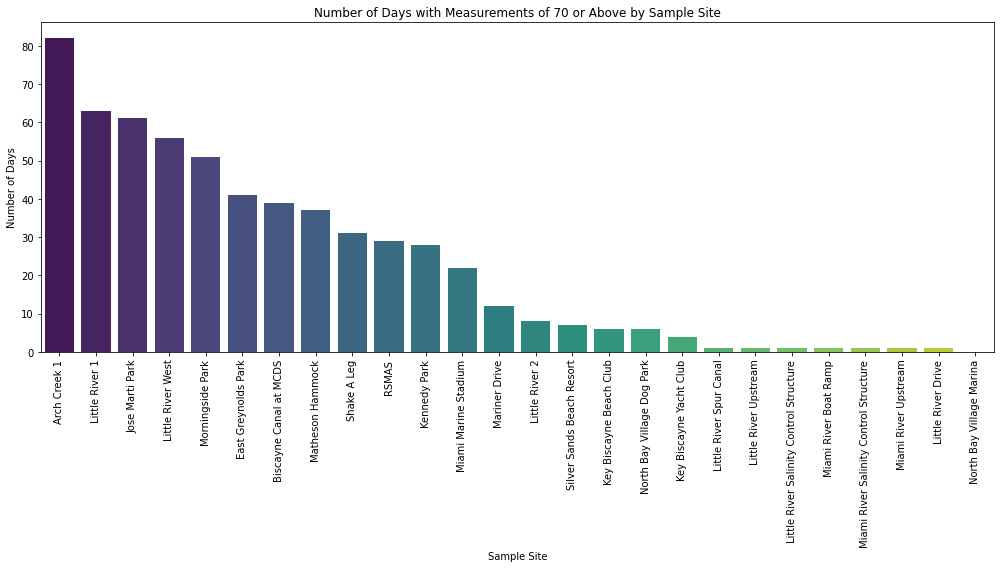

In [9]:
# Create the bar graph using seaborn or matplotlib

plt.figure(figsize=(14, 8))
sns.barplot(x=count_70_or_above_sorted.index, y=count_70_or_above_sorted.values, palette='viridis')
plt.title('Number of Days with Measurements of 70 or Above by Sample Site')
plt.xlabel('Sample Site')
plt.ylabel('Number of Days')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## What observations can you make from the data? Why might we not want to conclude from this graph alone that Arch Creek 1 is the most contaminated site even though it's failed the most tests?

Example Answers:

- Arch Creek 1 has failed the most water quality tests 
- HOWEVER, since each of the sites are tested at varying frequencies, it's possible that Arch Creek 1 was just tested the most. We will create a heatmap later to test this possibility. In order to accurately make conclusions for a visual like this, you'd want to know the percentage of failing tests, rather than the number of failed tests - this is an exercise that could/should be added to this case study but will not be included in this draft. 



## Let's change gears for a moment and look at trends across all of the sample sites over time -- here we will learn about the .to_datetime function, which will be used convert the dates in the column headers to datetime values for further analysis

Steps: 
- Transpose the dataframe
- Convert the data indexes to datatime values
- Sort the indexes (just in case)

In [10]:
# Let's preview the data once more for reference
df_cleaned.head(2)

,8/21/2023,8/14/2023,8/7/2023,7/31/2023,7/24/2023,7/12/2023,7/10/2023,7/3/2023,6/28/2023,6/26/2023,...,2/9/2022,2/7/2022,1/31/2022,1/26/2022,1/24/2022,1/19/2022,1/13/2022,1/10/2022,1/4/2022,1/3/2022
Sample Site,,,,,,,,,,,,,,,,,,,,,
Arch Creek 1,NaN,NaN,NaN,NaN,NaN,983.0,NaN,NaN,3199.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Biscayne Canal at MCDS,NaN,NaN,NaN,NaN,NaN,141.0,NaN,NaN,771.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Let's check the date type of the the column headers
type(df_cleaned.columns[0])

str

In [12]:
# Since the columns are strings, we need to convert them to datetime values. We can used the .to_datetime() function to do this. But since all the column with dates need to be converted we can make things easier for ourselves by transposing the data so that the dates are arranged in one column as the index.
df_transposed = df_cleaned.transpose()
df_transposed.head(2)

Sample Site,Arch Creek 1,Biscayne Canal at MCDS,East Greynolds Park,Jose Marti Park,Kennedy Park,Key Biscayne Beach Club,Key Biscayne Yacht Club,Little River 1,Little River 2,Little River Drive,...,Miami Marine Stadium,Miami River Boat Ramp,Miami River Salinity Control Structure,Miami River Upstream,Morningside Park,North Bay Village Dog Park,North Bay Village Marina,RSMAS,Shake A Leg,Silver Sands Beach Resort
0,,,,,,,,,,,,,,,,,,,,,
8/21/2023,NaN,NaN,NaN,NaN,20.0,393.0,10.0,NaN,NaN,NaN,...,52.0,NaN,NaN,NaN,74.0,NaN,52.0,20.0,6653.0,206.0
8/14/2023,NaN,NaN,NaN,NaN,52.0,20.0,10.0,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,10.0,5.0,NaN,52.0,10.0,5.0


In [13]:
# By transposing the data, we can now also run the decribe function to get stats for all the samples sites instead of just getting stats for all the testing days
df_transposed.describe()

Sample Site,Arch Creek 1,Biscayne Canal at MCDS,East Greynolds Park,Jose Marti Park,Kennedy Park,Key Biscayne Beach Club,Key Biscayne Yacht Club,Little River 1,Little River 2,Little River Drive,...,Miami Marine Stadium,Miami River Boat Ramp,Miami River Salinity Control Structure,Miami River Upstream,Morningside Park,North Bay Village Dog Park,North Bay Village Marina,RSMAS,Shake A Leg,Silver Sands Beach Resort
count,85.000000,68.000000,71.000000,102.000000,89.000000,88.000000,87.000000,76.000000,9.000000,1.0,...,89.000000,1.0,1.0,1.0,103.000000,50.000000,10.000000,93.000000,93.000000,89.000000
mean,2535.270588,514.808824,790.070423,442.117647,286.247191,45.954545,86.643678,936.723684,745.777778,303.0,...,82.685393,107.0,107.0,122.0,424.097087,89.820000,15.400000,96.376344,830.354839,57.943820
std,5784.960774,2922.515893,3958.790617,1557.604929,943.639211,257.888638,618.198940,3217.457235,876.152495,NaN,...,183.756236,NaN,NaN,NaN,1144.908101,405.391254,19.397594,263.986203,3666.110315,344.547706
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,303.0,...,0.000000,107.0,107.0,122.0,0.000000,5.000000,5.000000,0.000000,0.000000,5.000000
25%,173.000000,41.000000,31.000000,41.000000,10.000000,5.000000,5.000000,97.500000,185.000000,303.0,...,5.000000,107.0,107.0,122.0,10.000000,5.000000,5.000000,5.000000,10.000000,5.000000
50%,414.000000,80.500000,134.000000,97.000000,31.000000,5.000000,5.000000,181.000000,285.000000,303.0,...,20.000000,107.0,107.0,122.0,63.000000,10.000000,5.000000,30.000000,31.000000,5.000000
75%,1222.000000,193.000000,366.000000,208.750000,97.000000,10.000000,10.000000,362.500000,1174.000000,303.0,...,63.000000,107.0,107.0,122.0,224.000000,35.000000,10.000000,84.000000,95.000000,20.000000
max,24196.000000,24196.000000,33000.000000,11199.000000,6910.000000,2400.000000,5748.000000,24196.000000,2755.000000,303.0,...,1222.000000,107.0,107.0,122.0,7701.000000,2851.000000,52.000000,2359.000000,24196.000000,3255.000000


In [14]:
#Now we can convert the index column with the dates to datetime values. 
df_transposed.index = pd.to_datetime(df_transposed.index, errors='coerce')

In [15]:
#The data type of the values in the index has been successfully converted to dtype('<M8[ns]'), which is a specific NumPy representation for datetime64 objects at nanosecond resolution.
df_transposed.index.dtype

dtype('<M8[ns]')

In [16]:
#Sort the data
df_transposed.sort_index(inplace=True)
df_transposed

Sample Site,Arch Creek 1,Biscayne Canal at MCDS,East Greynolds Park,Jose Marti Park,Kennedy Park,Key Biscayne Beach Club,Key Biscayne Yacht Club,Little River 1,Little River 2,Little River Drive,...,Miami Marine Stadium,Miami River Boat Ramp,Miami River Salinity Control Structure,Miami River Upstream,Morningside Park,North Bay Village Dog Park,North Bay Village Marina,RSMAS,Shake A Leg,Silver Sands Beach Resort
0,,,,,,,,,,,,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,146.0,31.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,20.0,NaN
2022-01-04,NaN,NaN,NaN,NaN,NaN,10.0,5.0,NaN,NaN,NaN,...,31.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,161.0
2022-01-10,NaN,NaN,NaN,52.0,41.0,5.0,5.0,NaN,NaN,NaN,...,41.0,NaN,NaN,NaN,52.0,NaN,NaN,323.0,52.0,5.0
2022-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN
2022-01-19,NaN,NaN,NaN,20.0,5.0,5.0,5.0,NaN,NaN,NaN,...,41.0,NaN,NaN,NaN,5.0,NaN,NaN,5.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-24,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0
2023-07-31,NaN,NaN,NaN,NaN,10.0,5.0,10.0,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,121.0,20.0,NaN,41.0,94.0,5.0
2023-08-07,NaN,NaN,NaN,NaN,52.0,20.0,5.0,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,30.0,NaN,5.0,10.0,85.0,5.0


In [17]:
#Now that the dates are converted to datetime values, we can apply additional functions on the data such as aggregating by month using the .resample() function.
heatmap_df_monthly = df_transposed.resample('M').max()
heatmap_df_monthly

Sample Site,Arch Creek 1,Biscayne Canal at MCDS,East Greynolds Park,Jose Marti Park,Kennedy Park,Key Biscayne Beach Club,Key Biscayne Yacht Club,Little River 1,Little River 2,Little River Drive,...,Miami Marine Stadium,Miami River Boat Ramp,Miami River Salinity Control Structure,Miami River Upstream,Morningside Park,North Bay Village Dog Park,North Bay Village Marina,RSMAS,Shake A Leg,Silver Sands Beach Resort
0,,,,,,,,,,,,,,,,,,,,,
2022-01-31,NaN,NaN,NaN,146.0,41.0,10.0,5.0,NaN,NaN,NaN,...,41.0,NaN,NaN,NaN,52.0,NaN,NaN,323.0,52.0,161.0
2022-02-28,NaN,NaN,NaN,295.0,41.0,5.0,5.0,NaN,NaN,NaN,...,52.0,NaN,NaN,NaN,52.0,NaN,NaN,52.0,63.0,31.0
2022-03-31,NaN,NaN,NaN,132.0,359.0,31.0,20.0,NaN,NaN,NaN,...,41.0,NaN,NaN,NaN,75.0,NaN,NaN,114.0,41.0,20.0
2022-04-30,NaN,NaN,NaN,132.0,98.0,10.0,10.0,NaN,NaN,NaN,...,86.0,NaN,NaN,NaN,75.0,NaN,NaN,216.0,52.0,20.0
2022-05-31,NaN,NaN,NaN,109.0,292.0,5.0,31.0,NaN,NaN,NaN,...,41.0,NaN,NaN,NaN,85.0,NaN,NaN,74.0,20.0,20.0
2022-06-30,573.0,189.0,862.0,389.0,845.0,74.0,30.0,1186.0,NaN,NaN,...,41.0,NaN,NaN,NaN,6893.0,NaN,NaN,241.0,95.0,96.0
2022-07-31,14136.0,112.0,528.0,546.0,31.0,30.0,5.0,12997.0,NaN,NaN,...,73.0,NaN,NaN,NaN,682.0,NaN,NaN,121.0,52.0,30.0
2022-08-31,4106.0,233.0,134.0,10011.0,86.0,85.0,5.0,1664.0,NaN,NaN,...,110.0,NaN,NaN,NaN,7701.0,85.0,NaN,388.0,24196.0,52.0
2022-09-30,24196.0,657.0,275.0,455.0,311.0,51.0,10.0,670.0,NaN,NaN,...,891.0,NaN,NaN,NaN,683.0,41.0,NaN,504.0,84.0,63.0


In [18]:
# Calculate the max water quality metric for each month across all sample sites
monthly_avg_metric = heatmap_df_monthly.max(axis=1)

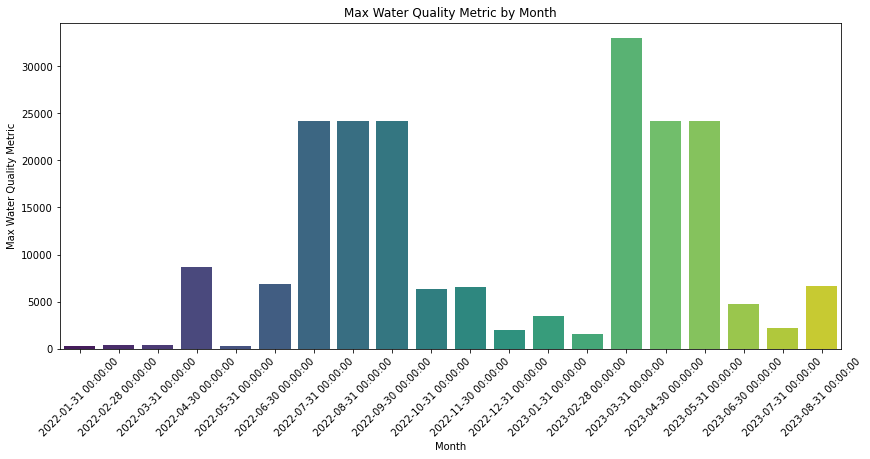

In [19]:
# Create the bar graph using seaborn or matplotlib

# Create a bar plot to visualize the water quality metric for each month
plt.figure(figsize=(14, 6))

# plt.bar(monthly_avg_metric.index, monthly_avg_metric.values, color='blue')
sns.barplot(x=monthly_avg_metric.index, y= monthly_avg_metric.values, palette='viridis')

plt.title('Max Water Quality Metric by Month')
plt.xlabel('Month')
plt.ylabel('Max Water Quality Metric')
plt.xticks(rotation=45)

plt.show()

##  Does there appear to be any relation to the maximum water quality metric by month and the rainy season? What conclusions can and cannot by made from the resulting bargraph?

Example answers:
- The max water quality metrics by month do have some relation to the rainy season in Miami, however for conclusive evidence we'd need to look at a larger dataset taken over a longer period of time -- in other words, we'd need to see how water metrics measured up for more seasons. If we had more months/years we could run T-Tests test to see if there is statistical significance of the water quality metrics for each season.  

## Another visual that would be insightful in visualizing the test results is a variation of heatmap created by styling the DataFrame

In [20]:
#Transpose the df_cleaned DataFrame like before
heatmap_df = df_cleaned.transpose()

#Convert the date column/index values to date/time 
heatmap_df.index = pd.to_datetime(heatmap_df.index, errors='coerce')

#Sort the data
heatmap_df.sort_index(inplace=True)

In [21]:
# Resample the data by month and identify the max metric for each month
heatmap_df_monthly = heatmap_df.resample('M').max()

In [22]:
# Define conditional to set background color
def color_cells(val):
    if val >= 70:
        return 'background-color: red'
    elif val <= 69:
        return 'background-color: green'
    else:
        return ''

In [23]:
# Apply Styling using the .style with .applymap for the color_cells function   
heatmap_df_monthly.style.applymap(color_cells)

Sample Site,Arch Creek 1,Biscayne Canal at MCDS,East Greynolds Park,Jose Marti Park,Kennedy Park,Key Biscayne Beach Club,Key Biscayne Yacht Club,Little River 1,Little River 2,Little River Drive,Little River Salinity Control Structure,Little River Spur Canal,Little River Upstream,Little River West,Mariner Drive,Matheson Hammock,Miami Marine Stadium,Miami River Boat Ramp,Miami River Salinity Control Structure,Miami River Upstream,Morningside Park,North Bay Village Dog Park,North Bay Village Marina,RSMAS,Shake A Leg,Silver Sands Beach Resort
0,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-31 00:00:00,nan,nan,nan,146.000000,41.000000,10.000000,5.000000,nan,nan,nan,nan,nan,nan,nan,61.000000,121.000000,41.000000,nan,nan,nan,52.000000,nan,nan,323.000000,52.000000,161.000000
2022-02-28 00:00:00,nan,nan,nan,295.000000,41.000000,5.000000,5.000000,nan,nan,nan,nan,nan,nan,nan,31.000000,350.000000,52.000000,nan,nan,nan,52.000000,nan,nan,52.000000,63.000000,31.000000
2022-03-31 00:00:00,nan,nan,nan,132.000000,359.000000,31.000000,20.000000,nan,nan,nan,nan,nan,nan,nan,41.000000,98.000000,41.000000,nan,nan,nan,75.000000,nan,nan,114.000000,41.000000,20.000000
2022-04-30 00:00:00,nan,nan,nan,132.000000,98.000000,10.000000,10.000000,nan,nan,nan,nan,nan,nan,nan,20.000000,8704.000000,86.000000,nan,nan,nan,75.000000,nan,nan,216.000000,52.000000,20.000000
2022-05-31 00:00:00,nan,nan,nan,109.000000,292.000000,5.000000,31.000000,nan,nan,nan,nan,nan,nan,nan,63.000000,109.000000,41.000000,nan,nan,nan,85.000000,nan,nan,74.000000,20.000000,20.000000
2022-06-30 00:00:00,573.000000,189.000000,862.000000,389.000000,845.000000,74.000000,30.000000,1186.000000,nan,nan,nan,nan,nan,185.000000,2723.000000,31.000000,41.000000,nan,nan,nan,6893.000000,nan,nan,241.000000,95.000000,96.000000
2022-07-31 00:00:00,14136.000000,112.000000,528.000000,546.000000,31.000000,30.000000,5.000000,12997.000000,nan,nan,nan,nan,nan,24196.000000,20.000000,119.000000,73.000000,nan,nan,nan,682.000000,nan,nan,121.000000,52.000000,30.000000
2022-08-31 00:00:00,4106.000000,233.000000,134.000000,10011.000000,86.000000,85.000000,5.000000,1664.000000,nan,nan,nan,nan,nan,4160.000000,41.000000,1396.000000,110.000000,nan,nan,nan,7701.000000,85.000000,nan,388.000000,24196.000000,52.000000
2022-09-30 00:00:00,24196.000000,657.000000,275.000000,455.000000,311.000000,51.000000,10.000000,670.000000,nan,nan,nan,nan,nan,428.000000,72.000000,336.000000,891.000000,nan,nan,nan,683.000000,41.000000,nan,504.000000,84.000000,63.000000


## What observations can we make from this visualization?

Example answers:
- Arch Creek 1, Biscayne Canal at MCDS,Biscayne Canal at MCDS, Little River 1 etc... have had excessive contaminants every single month
- Key Biscaye has had the most 'passing' months
...

## Bonus Visual: Focused on Advanced Matplotlib detailing

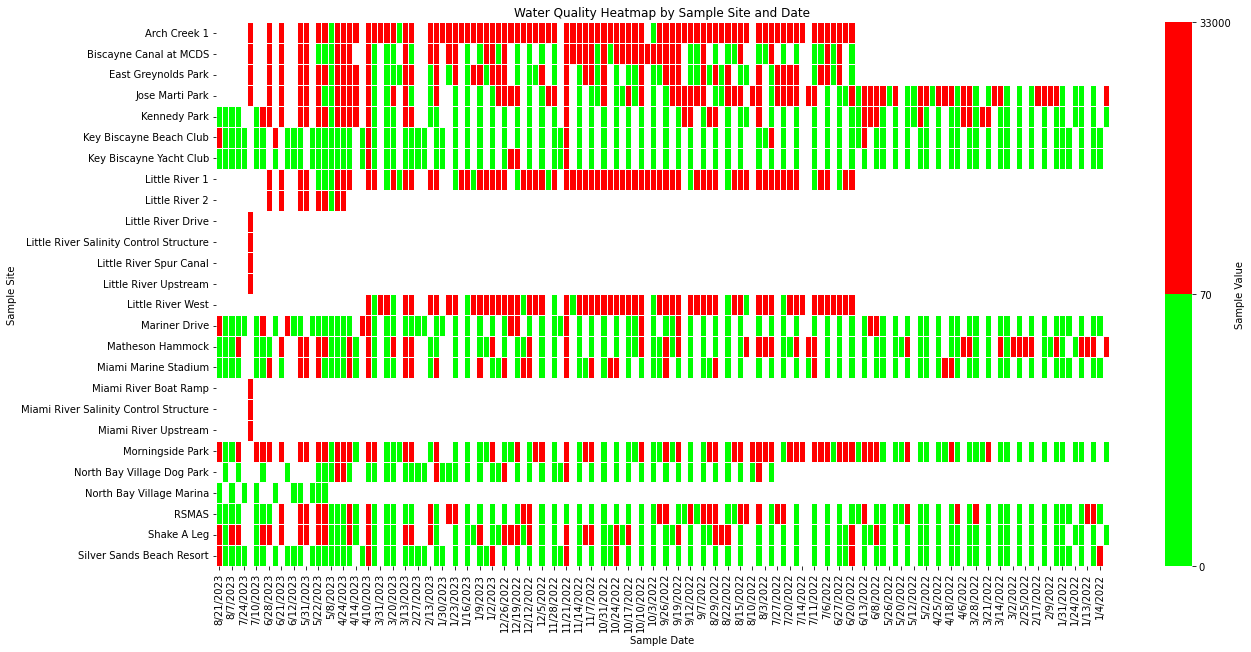

In [24]:
max_sample_value = df_cleaned.max().max()

# Create a binary colormap
binary_colors = np.array([[0, 1, 0, 1],  # Green for values <= 69   . Note RGBA sequence
                          [1, 0, 0, 1]])  # Red for values >= 70

binary_cmap = plt.matplotlib.colors.ListedColormap(binary_colors, 'binary_cmap')

# Define color mapping boundaries
bounds = [0, 69.5, max_sample_value]
norm = plt.matplotlib.colors.BoundaryNorm(bounds, binary_cmap.N)

# Generate the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df_cleaned, annot=False, cmap=binary_cmap, cbar=True, linewidths=.5, 
            vmin=0, vmax=max_sample_value, mask=df_cleaned.isnull(), norm=norm,
            cbar_kws={"label": "Sample Value", 'ticks': [0, 70, max_sample_value]})
plt.title("Water Quality Heatmap by Sample Site and Date")
plt.xlabel("Sample Date")
plt.ylabel("Sample Site")

# Show the plot
plt.show()